# Imports

In [3]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import KFold, cross_validate, LeaveOneOut, train_test_split, GridSearchCV
import pandas as pd

# Information on Support vector machines
[sklearn website](https://scikit-learn.org/stable/modules/svm.html#svm-kernels)

# Create some fake data

In [2]:
X = np.random.rand(20)
print(X)

[0.00308122 0.25865966 0.83600584 0.34755135 0.46534994 0.6492493
 0.16142487 0.52242716 0.66373048 0.0580653  0.65593346 0.84373899
 0.1540254  0.77479057 0.40662182 0.13985343 0.54261936 0.5815225
 0.57731462 0.74569474]


In [3]:
## reshape data for fitting model
X = X.reshape(-1,1)
print(X)

[[0.00308122]
 [0.25865966]
 [0.83600584]
 [0.34755135]
 [0.46534994]
 [0.6492493 ]
 [0.16142487]
 [0.52242716]
 [0.66373048]
 [0.0580653 ]
 [0.65593346]
 [0.84373899]
 [0.1540254 ]
 [0.77479057]
 [0.40662182]
 [0.13985343]
 [0.54261936]
 [0.5815225 ]
 [0.57731462]
 [0.74569474]]


In [4]:
y = np.random.randint(0,2, size=20)
print(y)

[0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


# Call our SVM module to create an instance of a classifier

In [5]:
clf = svm.SVC()

## Explore the inputs of the SVC

In [6]:
svm.SVC??

Init signature:
svm.SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Source:        
class SVC(BaseSVC):
    """C-Support Vector Classification.

    The implementation is based on libsvm. The fit time scales at least
    quadratically with the number of samples and may be impractical
    beyond tens of thousands of samples. For large datasets
    consider using :class:`~sklearn.svm.LinearSVC` or
    :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
    :class:`~sklearn.kernel_approximation.Nystroem` transformer.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functions and how `gamma`, `coef0` and `degr

# Fit model

In [11]:
# Fit the model to x and y
clf.fit(X,y)

SVC()

In [12]:
# Verify we only have two classes
clf.classes_

array([0, 1])

## See how well the training data fits

In [13]:
# Get the training classification score
clf.score(X,y)

0.6

# What if we change the kernel?

In [14]:
# Kernels accepted by the function
list_kerns = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop over them and train a model

for kernel in list_kerns:
    print(f'Kernel being used is {kernel}')
    clf = svm.SVC(kernel=kernel)
    clf.fit(X,y)
    print(clf.score(X,y))


Kernel being used is linear
0.55
Kernel being used is poly
0.55
Kernel being used is rbf
0.6
Kernel being used is sigmoid
0.55


# Grid Search

In [25]:
data_df = pd.read_csv('./data/60x61.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1,0.062832,0.097064,0.041652,0.008974,0.093586,0.011168,0.010246,0.097714,0.093843,...,0.003632,0.028356,0.066206,0.062532,0.100370,0.069072,0.025882,0.054651,0.112760,0.106070
1,1,0.025996,0.056383,0.052404,0.079622,0.070710,0.046787,0.004721,0.034333,0.059902,...,0.068505,0.030921,0.004277,0.059342,0.059611,0.025914,0.018308,0.102880,0.078364,0.049836
2,1,0.015806,0.099749,0.082649,0.076439,0.045748,0.061168,0.037715,0.105080,0.111370,...,0.073260,0.008919,0.012060,0.038680,0.013767,0.014770,0.028393,0.088890,0.021125,0.014470
3,1,0.096576,0.021273,0.071937,0.023003,0.051179,0.026095,0.014747,0.027601,0.011309,...,0.075601,0.028319,0.004177,0.026253,0.025739,0.018103,0.075973,0.057072,0.043127,0.024063
4,1,0.024500,0.038100,0.019063,0.004089,0.023010,0.104540,0.075521,0.032552,0.018125,...,0.061589,0.030194,0.004605,0.041527,0.050398,0.008049,0.125900,0.101010,0.026404,0.004397


In [33]:
y = data_df.iloc[:,0]
X = abs(data_df.iloc[:,1:])

(48, 60)
(12, 60)
(48,)


In [34]:
params = {
    'C': [1,10,100,1000],
    'gamma': ['scale','auto',0.01, 0.001, 0.0001]
}

In [35]:
# get cv
loo = LeaveOneOut()

# initalize model
svm_clf = svm.SVC(kernel='rbf')
grid = GridSearchCV(svm_clf, cv=loo, param_grid=params)

In [36]:
# fit the model
grid.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001]})

In [37]:
pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
17,0.000762,0.000019,0.000487,0.000005,1000,0.01,"{'C': 1000, 'gamma': 0.01}",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.983333,0.128019,1
16,0.000807,0.000023,0.000491,0.000008,1000,auto,"{'C': 1000, 'gamma': 'auto'}",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.983333,0.128019,1
0,0.000894,0.000187,0.000567,0.000103,1,scale,"{'C': 1, 'gamma': 'scale'}",1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.900000,0.300000,3
5,0.000799,0.000061,0.000510,0.000039,10,scale,"{'C': 10, 'gamma': 'scale'}",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.900000,0.300000,3
15,0.000758,0.000020,0.000486,0.000019,1000,scale,"{'C': 1000, 'gamma': 'scale'}",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.900000,0.300000,3
10,0.000764,0.000008,0.000488,0.000003,100,scale,"{'C': 100, 'gamma': 'scale'}",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.900000,0.300000,3
11,0.000763,0.000092,0.000514,0.000078,100,auto,"{'C': 100, 'gamma': 'auto'}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.489898,7
6,0.000711,0.000009,0.000478,0.000007,10,auto,"{'C': 10, 'gamma': 'auto'}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,8
7,0.000718,0.000019,0.000484,0.000010,10,0.01,"{'C': 10, 'gamma': 0.01}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,8
8,0.000720,0.000009,0.000485,0.000005,10,0.001,"{'C': 10, 'gamma': 0.001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,8


In [38]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)
print(grid.best_score_)

SVC(C=1000, gamma='auto')
{'C': 1000, 'gamma': 'auto'}
16
0.9833333333333333


In [11]:
# output results to csv
pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False).to_csv('SVM_gridsearch_results.csv')

# Removing observations with low variance

In [26]:
eig_centrality_df = pd.read_csv('./data/eig_centrality.csv', header=None).abs()
eig_centrality_df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,294
0,1,0.067894,0.062832,0,0,0,0.031240,0.071004,0,0,...,0.112760,0.106070,0.000000e+00,0.000000e+00,0.028195,0.024616,0.042535,0.087451,0.003145,0.047196
1,1,0.031793,0.025996,0,0,0,0.122030,0.109220,0,0,...,0.078364,0.049836,0.000000e+00,6.938900e-18,0.076947,0.078418,0.064815,0.095082,0.054585,0.076347
2,1,0.005251,0.015806,0,0,0,0.124040,0.117020,0,0,...,0.021125,0.014470,0.000000e+00,1.734700e-18,0.068705,0.084321,0.047107,0.004649,0.142760,0.129450
3,1,0.123150,0.096576,0,0,0,0.045236,0.005143,0,0,...,0.043127,0.024063,5.551100e-17,1.110200e-16,0.064510,0.100380,0.112950,0.099919,0.006036,0.004228
4,1,0.059846,0.024500,0,0,0,0.022105,0.022153,0,0,...,0.026404,0.004397,4.336800e-19,0.000000e+00,0.068379,0.006091,0.050172,0.056009,0.077894,0.016500
5,1,0.047201,0.023249,0,0,0,0.107190,0.117740,0,0,...,0.047042,0.084535,0.000000e+00,0.000000e+00,0.095798,0.073266,0.094619,0.084386,0.081942,0.105320
6,1,0.089435,0.080275,0,0,0,0.001140,0.014447,0,0,...,0.005671,0.003008,0.000000e+00,0.000000e+00,0.009444,0.036900,0.022935,0.029724,0.020147,0.023445
7,1,0.092537,0.003668,0,0,0,0.129430,0.107730,0,0,...,0.015637,0.001023,2.168400e-19,0.000000e+00,0.038453,0.111860,0.055049,0.015476,0.125960,0.093968
8,1,0.022265,0.048711,0,0,0,0.048122,0.032252,0,0,...,0.021779,0.004315,2.710500e-20,0.000000e+00,0.099726,0.076015,0.106140,0.054908,0.038627,0.040091
9,1,0.111080,0.023740,0,0,0,0.027010,0.011543,0,0,...,0.011984,0.053828,6.938900e-18,2.775600e-17,0.059277,0.059997,0.101670,0.027837,0.029670,0.012809


In [27]:
eig_centrality_df = eig_centrality_df.loc[:, eig_centrality_df.var() > 0.0005]
eig_centrality_df.head(20)

,0,1,2,6,7,10,12,13,14,15,...,283,284,285,286,289,290,291,292,293,294
0,1,0.067894,0.062832,0.031240,0.071004,0.030888,0.009534,0.044660,0.043163,0.025440,...,0.064658,0.124140,0.112760,0.106070,0.028195,0.024616,0.042535,0.087451,0.003145,0.047196
1,1,0.031793,0.025996,0.122030,0.109220,0.005733,0.017223,0.072822,0.077072,0.126650,...,0.108250,0.116960,0.078364,0.049836,0.076947,0.078418,0.064815,0.095082,0.054585,0.076347
2,1,0.005251,0.015806,0.124040,0.117020,0.017355,0.035984,0.106950,0.011851,0.077032,...,0.102060,0.123930,0.021125,0.014470,0.068705,0.084321,0.047107,0.004649,0.142760,0.129450
3,1,0.123150,0.096576,0.045236,0.005143,0.017959,0.060064,0.008232,0.076910,0.042061,...,0.057364,0.023296,0.043127,0.024063,0.064510,0.100380,0.112950,0.099919,0.006036,0.004228
4,1,0.059846,0.024500,0.022105,0.022153,0.079495,0.013115,0.019867,0.032033,0.012232,...,0.026515,0.027951,0.026404,0.004397,0.068379,0.006091,0.050172,0.056009,0.077894,0.016500
5,1,0.047201,0.023249,0.107190,0.117740,0.010293,0.040863,0.098316,0.047187,0.101880,...,0.115760,0.118630,0.047042,0.084535,0.095798,0.073266,0.094619,0.084386,0.081942,0.105320
6,1,0.089435,0.080275,0.001140,0.014447,0.027198,0.026102,0.116720,0.049616,0.060910,...,0.022170,0.026753,0.005671,0.003008,0.009444,0.036900,0.022935,0.029724,0.020147,0.023445
7,1,0.092537,0.003668,0.129430,0.107730,0.088690,0.042226,0.059388,0.037930,0.075362,...,0.097732,0.133240,0.015637,0.001023,0.038453,0.111860,0.055049,0.015476,0.125960,0.093968
8,1,0.022265,0.048711,0.048122,0.032252,0.037123,0.059852,0.011789,0.071290,0.109800,...,0.055190,0.050836,0.021779,0.004315,0.099726,0.076015,0.106140,0.054908,0.038627,0.040091
9,1,0.111080,0.023740,0.027010,0.011543,0.089719,0.020014,0.013929,0.058090,0.067178,...,0.026348,0.056170,0.011984,0.053828,0.059277,0.059997,0.101670,0.027837,0.029670,0.012809


<AxesSubplot:>

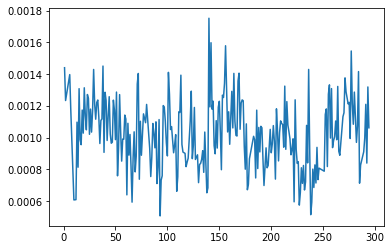

In [28]:
eig_centrality_df.iloc[:,1:].var().plot()

In [29]:
y = eig_centrality_df.iloc[:,0]
X = abs(eig_centrality_df.iloc[:,1:])
print(y.shape)
print(X.shape)

(60,)
(60, 268)


In [30]:
params = {
    'C': [1,10,100,1000],
    'gamma': ['scale','auto',0.01, 0.001, 0.0001]
}

In [31]:
# get cv
loo = LeaveOneOut()

# initalize model
svm_clf = svm.SVC(kernel='rbf')
grid = GridSearchCV(svm_clf, cv=loo, param_grid=params)

In [32]:
# fit the model
grid.fit(X,y)

GridSearchCV(cv=LeaveOneOut(), estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001]})

In [33]:
pd.DataFrame(grid.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split53_test_score,split54_test_score,split55_test_score,split56_test_score,split57_test_score,split58_test_score,split59_test_score,mean_test_score,std_test_score,rank_test_score
16,0.001539,0.000041,0.000961,0.000022,1000,auto,"{'C': 1000, 'gamma': 'auto'}",0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.533333,0.498888,1
19,0.001516,0.000044,0.000960,0.000029,1000,0.0001,"{'C': 1000, 'gamma': 0.0001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
13,0.001514,0.000035,0.000958,0.000018,100,0.001,"{'C': 100, 'gamma': 0.001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
2,0.001515,0.000031,0.000961,0.000029,1,0.01,"{'C': 1, 'gamma': 0.01}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
3,0.001514,0.000046,0.000972,0.000045,1,0.001,"{'C': 1, 'gamma': 0.001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
4,0.001501,0.000037,0.000960,0.000024,1,0.0001,"{'C': 1, 'gamma': 0.0001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
17,0.001568,0.000038,0.000963,0.000028,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.516667,0.499722,2
6,0.001522,0.000041,0.000968,0.000032,10,auto,"{'C': 10, 'gamma': 'auto'}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
7,0.001517,0.000033,0.000962,0.000029,10,0.01,"{'C': 10, 'gamma': 0.01}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2
8,0.001517,0.000039,0.000959,0.000020,10,0.001,"{'C': 10, 'gamma': 0.001}",1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516667,0.499722,2


In [22]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_index_)
print(grid.best_score_)

SVC(C=1000, gamma='auto')
{'C': 1000, 'gamma': 'auto'}
16
0.5333333333333333
